# Exercise: Linear Regression with Numpy

** Perdicting Gallons per Mileage on the AUTO Dataset **


by 

[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)


__License__

This work is licensded under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)


## Introduction

The goal of this exercise is to implement linear regression through minimization of the Residual Sum of Sqaures (RSS) on the [UCI AUTO Dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG).

We will cover
 
 * Numpy usage: Load data, slice data, concatenate data
 * Calculate a linear model given a subset of the AUTO Dataset
 * Plot data and linear model for low dimensional variables and
 * Evaluate the goodness of fit




## Setting up IPython Notebook
The code below simply sets up ipython notebook and displays graphs inline (e.g. as HTML)


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Preparation and Preprocessing

We will 

 * Load the data
 * Clean the data

### Download and import the data

In [2]:
#shell scripts for downloading the data and placing it in a corresponding directory
!mkdir AUTO 
!curl -o AUTO/data "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
!curl -o AUTO/description "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names"
#download the description and display it here.
!cat AUTO/description

mkdir: cannot create directory ‘AUTO’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286  100 30286    0     0  44003      0 --:--:-- --:--:-- --:--:-- 44148
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1660  100  1660    0     0   4298      0 --:--:-- --:--:-- --:--:--  4334
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 

In [3]:
#import numpy now and load the data set into a numpy array
import numpy as np
auto = np.loadtxt("./AUTO/data")

ValueError: could not convert string to float: b'"chevrolet'

An error occured, since parts of the data contain no numbers. Lets investigate

In [4]:
#look at the first few examples.
!cat AUTO/data|grep "?"

25.0   4   98.00      ?          2046.      19.0   71  1	"ford pinto"
21.0   6   200.0      ?          2875.      17.0   74  1	"ford maverick"
40.9   4   85.00      ?          1835.      17.3   80  2	"renault lecar deluxe"
23.6   4   140.0      ?          2905.      14.3   80  1	"ford mustang cobra"
34.5   4   100.0      ?          2320.      15.8   81  2	"renault 18i"
23.0   4   151.0      ?          3035.      20.5   82  1	"amc concord dl"


### Clean the Data

We see, that the lost column is a string. We can not handle strings and hence have to exclude the cloumn. Moreover, some rows have a `?` indicating missing values. we to take care of these too.

In [5]:
#load the data, but exclude the last column 
#note that some rows have a '?' for missing values
#so we need to use the genfromtxt function, which allows proper handling
auto = np.genfromtxt("./AUTO/data",usecols=(0,1,2,3,4,5,6,7),missing_values='?')
#store the feature names for latter use
feature = ['mpg','cylinders','displacement','horsepower','weight','acceleration', 
           'model year', 'origin']
auto.shape

(398, 8)

In [6]:
auto

array([[  18. ,    8. ,  307. , ...,   12. ,   70. ,    1. ],
       [  15. ,    8. ,  350. , ...,   11.5,   70. ,    1. ],
       [  18. ,    8. ,  318. , ...,   11. ,   70. ,    1. ],
       ..., 
       [  32. ,    4. ,  135. , ...,   11.6,   82. ,    1. ],
       [  28. ,    4. ,  120. , ...,   18.6,   82. ,    1. ],
       [  31. ,    4. ,  119. , ...,   19.4,   82. ,    1. ]])

In [7]:
#missing values are displayed as nan. lets take a look which columns there are
np.any(np.isnan(auto),axis=0)

array([False, False, False,  True, False, False, False, False], dtype=bool)

In [8]:
#lets take a look which rows are affected 
auto_nan_rows = np.any(np.isnan(auto),axis=1)
auto[auto_nan_rows,]

array([[  2.50000000e+01,   4.00000000e+00,   9.80000000e+01,
                     nan,   2.04600000e+03,   1.90000000e+01,
          7.10000000e+01,   1.00000000e+00],
       [  2.10000000e+01,   6.00000000e+00,   2.00000000e+02,
                     nan,   2.87500000e+03,   1.70000000e+01,
          7.40000000e+01,   1.00000000e+00],
       [  4.09000000e+01,   4.00000000e+00,   8.50000000e+01,
                     nan,   1.83500000e+03,   1.73000000e+01,
          8.00000000e+01,   2.00000000e+00],
       [  2.36000000e+01,   4.00000000e+00,   1.40000000e+02,
                     nan,   2.90500000e+03,   1.43000000e+01,
          8.00000000e+01,   1.00000000e+00],
       [  3.45000000e+01,   4.00000000e+00,   1.00000000e+02,
                     nan,   2.32000000e+03,   1.58000000e+01,
          8.10000000e+01,   2.00000000e+00],
       [  2.30000000e+01,   4.00000000e+00,   1.51000000e+02,
                     nan,   3.03500000e+03,   2.05000000e+01,
          8.20000000e+01,   1.0

In [10]:
#lets remove nans 
auto_wo_nan = auto[~auto_nan_rows,]
print ('removed %d items'%(auto.shape[0]-auto_wo_nan.shape[0]))

removed 6 items


### Analysing the data set 

Before applying data mining methods on an unknown data set, one should try to get some statistical description of the data set. A good method therefore is the [boxplot](http://en.wikipedia.org/wiki/Box_plot)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


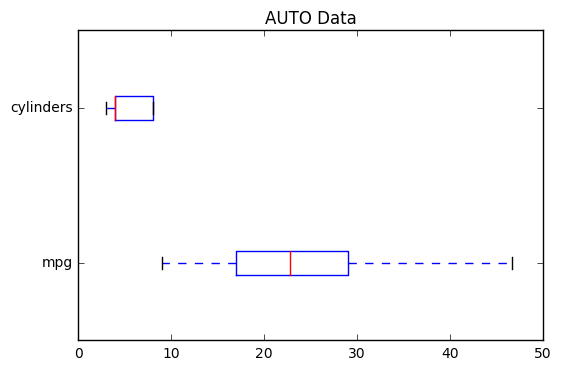

In [11]:
fig = figure()
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(auto_wo_nan[:,0:2],vert=False)
ax1.set_title("AUTO Data")
ax1.set_yticklabels(feature[0:2])
fig.show()

## Implementing the linear model

Using Numpy this becomes pretty easy. We just have to implement the function 

$$w=(X^TX)^{-1}X^Ty$$

(see [lecture slides, ML:II-45](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-regression.pdf))


In [13]:
import numpy.linalg as la
def linreg(X,y,bias=True):
    """
    X: data matrix n rows, d columns
    Y: target values n rows, 1 column
    bias: if true, a bias term is included at the end of the weight vector
    return: parameter vector w
    """
    if bias:
        X = np.concatenate((X,-np.ones((X.shape[0],1))), axis=1)
    w = np.dot(np.dot(la.inv(np.dot(X.T,X)),X.T),y) #that is the model
    out = np.dot(X,w) # that is the models output 
    rss = np.sum((out-y)**2) #that is the residual sum of squares
    return (w,out,rss) #we pass back the vector, the output and the rss error

### The Pseudoinverse

$(X^TX)^{-1}X^T$ defines the so called pseudo-inverse (more specificall the [Moore-Penrose Matrix Inverse](http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html), but why do we need that strange thing?

First of all, recall from you Linear Algebra class that the inverse only exists for squared matrices. This is not the case in our example. So a way to approximate the inverse for non-squared matrices is to use the above pseudo-inverse. But why?

We will get to this by an example. Consider that you have a one dimensional set of data points $X$. Lets say you want to predict the miles-per-gallon based on the weight of the car, that is $mpg = w_1*carweight+w_0$. So how many data points do you need for deriving the exact $w_1$ and $w_0$?

The answer is **2**. Given **2** data points you can uniquely find both parameters. Recall again from linear algebra that $mpg = w_1*carweight+w_0$. forms a linear equation system with two parameters. Given a system of linear equations, we have three possibilities:

  * **Determined: The number of equations (= the number of data points in our case) is the same as the number of parameters. **
  
  In this case, if there exists a unique solution we can find it by solving the linear equation system.
  
  * **Underdetermined: You have less data points (= lower number of equations) than parameters**
  
  If we have lets say 1 data point in our example above, than we can find an infinite amount of different solutions. The system of linear equations is **underdetermined**. This does not happen often in data mining, so we ignore the case. The data mining solution to this would be in getting more data or reducing the model.

  * **Overdetermined: You have more data points than parameters**
  
  If you have more data points than parameters, say 3, than you will have an **overdetermined** set of linear equations. That is what we often have in data analysis. So drilling further down we can distinguish between two cases again:
     
     1. There is one exact solution, satisfying all data points
     
     Like for example $mpg = 5*carweight+2$. We can generate an infinite amount of data points, where the vector space for those data points is spanned by two basis vectors. In practice we are given the data and do not know the exact model. So it is unlikely that a linear model is the correct model. Moreover, while the linear model might be the correct model, measurements could be noisy. For example, measuring the weight of a car might not be perfectly exact to the last point beyond the comma. So it is unlikely, that we can find an exact solution.
     
     This case is in principal the same as the determined case. We can find a unique solution.
     
     2. There is no unique solution, i.e. not all data points can be predicted by the model
     
     This is the case we will see below. The model can not explain all the data, only parts of it. Our goal here is to find "the best solution", where best has to be specified. That brings me back to the pseudoinverse above. The pseudoinverse provides the solution with the minimum variance, i.e. squared difference. A different choice of the pseudoinverse yields a different "best" solution. This is the case solved by the `linreg` function (and of course it also finds the unique solution, if it exists)





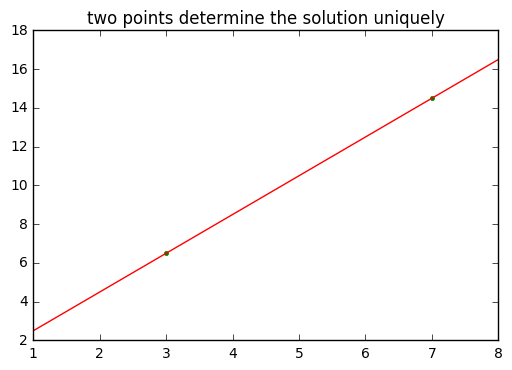

In [14]:
#the determined case, note that the data is one dimensional, because the last dimension is only the bias term
w=np.array([2, 0.5]).T
x=np.array([[3,1], [7,1]])
y=np.dot(x,w)
plot (x[:,0],y,'g.') #plot the data points
plot ([1,8],np.dot([[1,1],[8,1]],w),'r') #plot the line
title("two points determine the solution uniquely")
show()

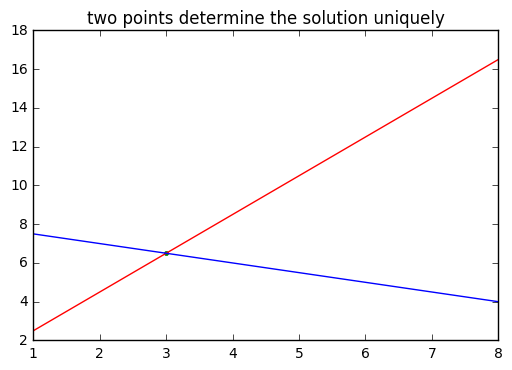

In [15]:
#the underdetermined case, note that the data is one dimensional, because the last dimension is only the bias term
w1=np.array([2, 0.5]).T #one correct solution
w2=np.array([-0.5, 8]).T #the second correct solution. in fact, infinit correct solutions exists
x=np.array([[3,1]])
y=np.dot(x,w1)
plot (x[:,0],y,'g.') #plot the data points
plot ([1,8],np.dot([[1,1],[8,1]],w1),'r') #plot solution w1
plot ([1,8],np.dot([[1,1],[8,1]],w2),'b') #plot solution w2. it also goes through the data point x
title("two points determine the solution uniquely")
show()

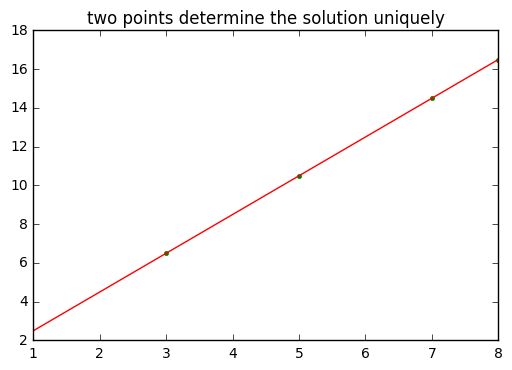

In [16]:
#the overdetermined case, with a unique solution
w1=np.array([2, 0.5]).T #one correct solution
x=np.array([[3,1],[5,1],[7,1],[8,1]])
y=np.dot(x,w1)
plot (x[:,0],y,'g.') #plot the data points
plot ([1,8],np.dot([[1,1],[8,1]],w1),'r') #plot solution w1
title("two points determine the solution uniquely")
show()

### A first test

Now lets test it on a small example. We want to predict miles-per-gallon (first feature) by cylinders und displacement (second and third feature)

In [17]:
feature


['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [19]:
X=auto_wo_nan[:,1:3]
y=auto_wo_nan[:,0]
(w,out,rss) = linreg(X,y)
print (rss)
print (w)

8342.56636579
[ -0.57634772  -0.0511185  -36.53770683]


Works. But was does the RSS mean? In principal, it is the (squared) deviation of the linear model from the data, the discrpeancy of the data from the model. Other names are sum of squared errors of prediction (SSE).It is an unscaled (i.e. depending on the number of data points considerd) measure ofdispersion (also called vairability). 

The RSS can be seen as a statistical variable measuring the deviation per data point. In order to get an **estimator of deviation per data point**, we can simply calculate the average RSS per data point. This is also known as the Mean  Squared Error (or MSE). 

In [20]:
mse = rss/(y.shape[0])
sqrt(mse)

4.6132479941562172

A intuitive interpretation of the Root-Mean-Square-Error $rmse=\sqrt{mse}$,  although not theoretical sound, is that on average we are ± 4.6 miles-per-gallon wrong with our model. The square root scales the error down to the unit of the attribute and hence allows propert interpretation

### Predicting on single variables

Now lets analye the AUTO data set and how good our regression is. We will first estimate a linear model from all single variables, plot the data plus the model and finally plot the MSE as summary

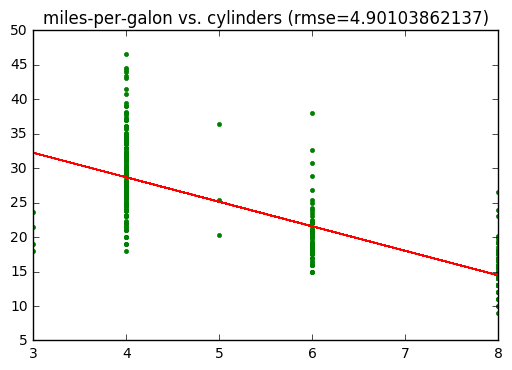

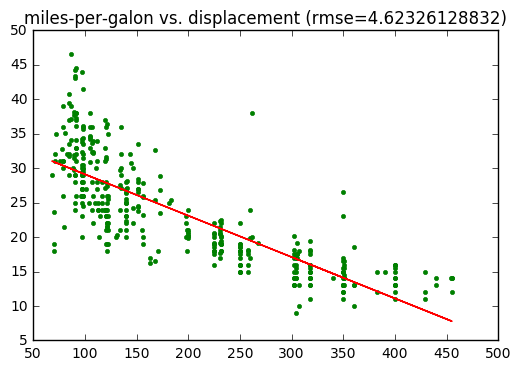

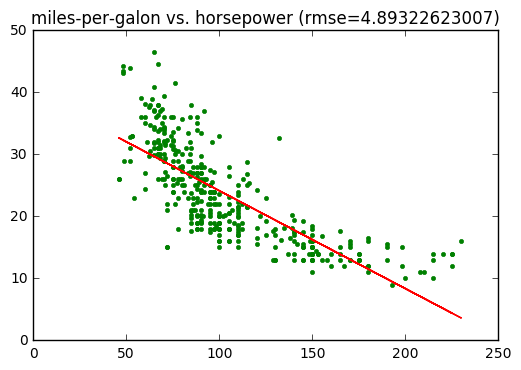

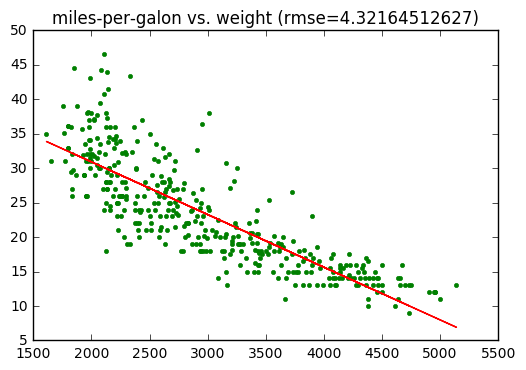

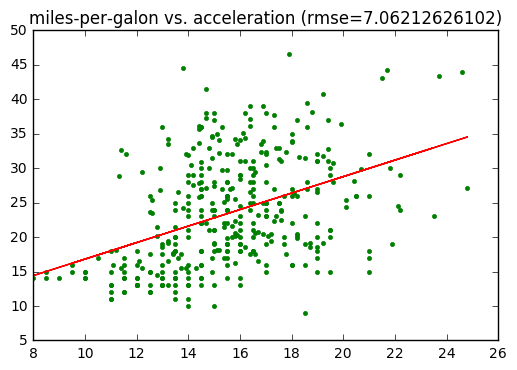

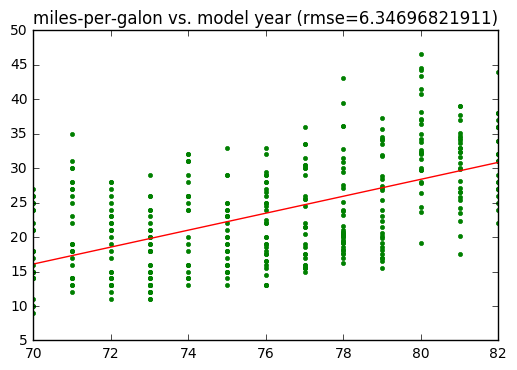

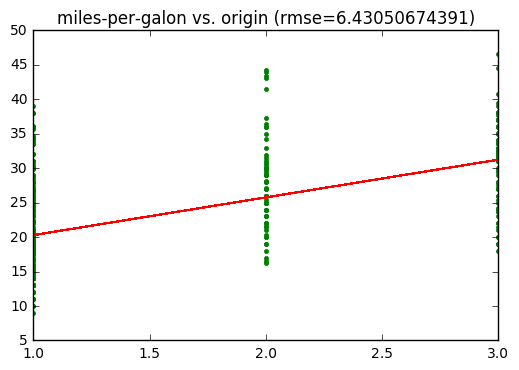

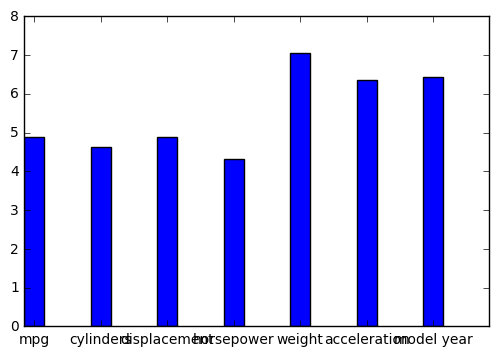

In [24]:
n_feat = auto_wo_nan.shape[1]
rmses =[]

for i in range(1,n_feat):
    X=auto_wo_nan[:,i:i+1] #i+1 is needed so that X stays a matrix
    y=auto_wo_nan[:,0]
    (w,out,rss) = linreg(X,y)
    rmse = sqrt(rss/(y.shape[0]))
    plot(X,y,'g.')
    plot(X,out,'r')
    title('miles-per-galon vs. '+ feature[i] + ' (rmse='+str(rmse)+')')
    show()
    rmses.append(rmse)
# now plot MSE curve   
ind = np.arange(len(rmses))
width = 0.3
bar(ind,rmses,width, label= 'Root Mean Square Errors',)
xticks(ind+width/2., feature)
show()

### Predicting on all variables

Extension to all variables is easy. We go from a 1D vector to a nD Matrix. Numpy handles the matrix calculation for us, so we just have to change the data. Since visualisation is not feasible, we have to rely on the MSE calculation.

In [26]:
X=auto_wo_nan[:,1:8]
y=auto_wo_nan[:,0]
(w,out,rss) = linreg(X,y)
rmse = sqrt(rss/(y.shape[0]))
print ("MSE for all features is %f"%(rmse))

MSE for all features is 3.293551


## Linear Regression for learning Classifications 

Now lets investigate the use of Linear Regression for classification. Therefore, we will introdued a new attribute called `greeness`. The attribute should reflect environmental impact of a car.

Afterwards, we will modify the linear regression algorithm to make such predictions.



In [27]:
#calculate the greeness attriute. usually this should be given in the data set
#1 means a car as low environmental impact, -1 is for high impact
green_mask = auto_wo_nan[:,0]>=25 #we need that later
greeness = (green_mask)*2-1 

In [28]:

greeness

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1

Now we simply use greeness as the dependent variable for our regression problem, i.e. the value we want to predict. For illustrative purpose, we only take the two variables which allows us to plot the examples in 2D

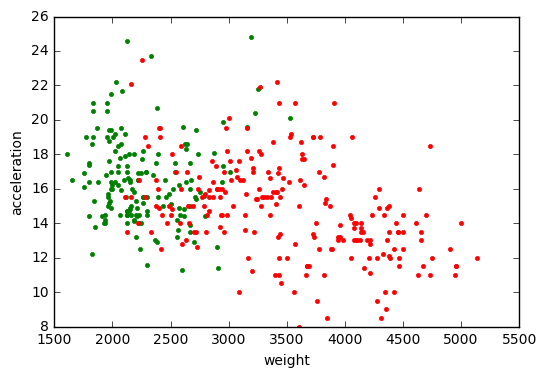

In [29]:
#select examples and plot in 2D
X=auto_wo_nan[:,(4,5)]
y=greeness
plot (X[green_mask,0],X[green_mask,1],'g.') #all green carse are plotted, yes you guess right, GREEN
plot (X[~green_mask,0],X[~green_mask,1],'r.') #all others are red
xlabel(feature[4])
ylabel(feature[5])
show()

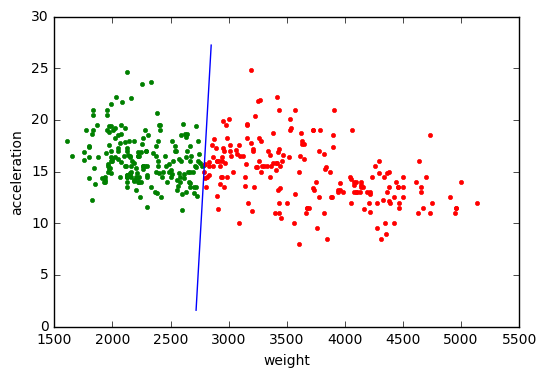

In [31]:
#now calculate the regression

(w,out,rss) = linreg(X,y)
green_predicted = out>0  #so that is based on the model we learned
#lets plot it for analysis reasons
plot (X[green_predicted,0],X[green_predicted,1],'g.') #all green carse are plotted, yes you guess right, GREEN
plot (X[~green_predicted,0],X[~green_predicted,1],'r.') #all others are red
xlabel(feature[4])
ylabel(feature[5])
#lets also plot w in the feature space. Note that 0=X*w is the line of separation
#hence, 0=w1*weight+w2*acceleration-w0 ==> acceleration=-w1/w2*weight+w0/w2
f = lambda weight:-w[0]/w[1]*weight+w[2]/w[1] #line function for separating positive from negative ones
plot([2720,2850],[f(2720),f(2850)],'b')
show()

### Decision Boundary

As we can see, there seems to be linear line as boundary of deciding between green cars and non-green ones (visualised as blue line). This is called the **decision boundary**. In general, the decision boundary is the separating function/hypothesis between two or more classes. In our case, it is a linear function determined by our model that $X*w^T\geq 0$ are green cars. Hence, the decision boundary is given as: 

$$0=Xw^T$$

For the case with 2 attributes, we can be rephrased the decision boundary in a line equation for plotting as follows: 

$$0=w_1*x_0+w_2*x_1-w_0 \Rightarrow y=x_1=-\frac{w_1}{w_2}*x_0+\frac{w_0}{w_2}$$

and we can draw the separating line between green and non green cars as done above. Moreover, we can compare on the original data what part of the classification is correct and which one is incorrect.


Recall also, that if two vectors $a$ and $b$ are orthogonal to each other, their dot product is zero, e.g. $a\cdot b=0$. Hence, the parameter vector $w$ is orthogonal to all examples $x$ on the decision boundary. 

The following figure shows the decision boundary (in blue) and the pependricular vector (in black). Since the attributes of the auto data set are of very different scale, we rescale the data first (Otherwise the figure would be hard to interpret).

[0.325, 0.342] [0.8665810294813503, 0.86617068812438602]


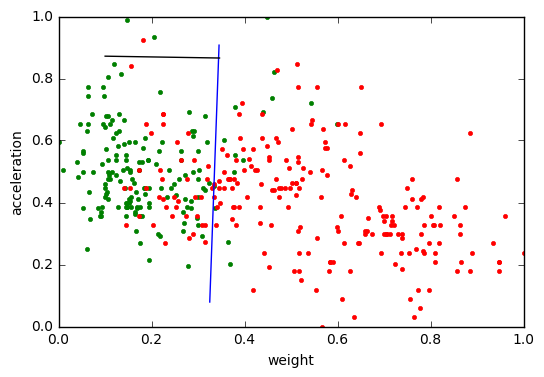

In [33]:
#now calculate the regression
X_scaled = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
(w,out,rss) = linreg(X_scaled,y)
#now plot the ORIGINAL DATA
plot (X_scaled[green_mask,0],X_scaled[green_mask,1],'g.') #all green carse are plotted, yes you guess right, GREEN
plot (X_scaled[~green_mask,0],X_scaled[~green_mask,1],'r.') #all others are red
xlabel(feature[4])
ylabel(feature[5])
# and plot the found w
k1,d1 = -w[0]/w[1],w[2]/w[1]
f = lambda weight:k1*weight+d1 #line function for separating positive from negative ones
plot([0.325,0.345],[f(0.325),f(0.345)],'b')
k2=-1.0/k1
f2 = lambda weight:k2*weight+f(0.344)-k2*(0.344) #perpendicular line through point 0.32,f(0.32)
print ([0.325,0.342],[f2(0.325),f2(0.342)])
plot([0.1,0.346],[f2(0.1),f2(0.346)],'k')
show()

Now lets do it with two other attributes: acceleration and horsepower

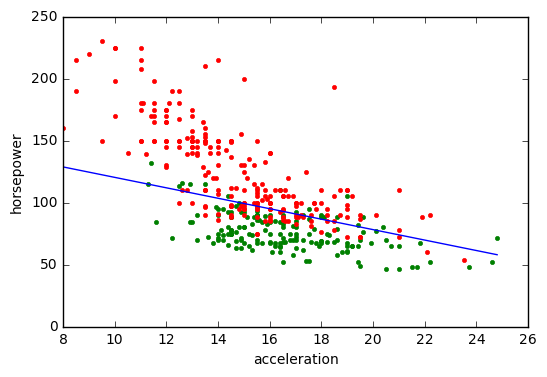

In [35]:
#select examples and plot in 2D
X=auto_wo_nan[:,(5,3)]
y=greeness
#now calculate the regression
(w,out,rss) = linreg(X,y)
#now plot the ORIGINAL DATA
plot (X[green_mask,0],X[green_mask,1],'g.') #all green carse are plotted, yes you guess right, GREEN
plot (X[~green_mask,0],X[~green_mask,1],'r.') #all others are red
xlabel(feature[5])
ylabel(feature[3])
# and plot the found w
k1,d1 = -w[0]/w[1],w[2]/w[1]
f = lambda weight:k1*weight+d1 #line function for separating positive from negative ones
mi,ma = min(X[:,0]),max(X[:,0])
plot([mi,ma],[f(mi),f(ma)],'b')
show()

### Evaluating the classification accuracy

We can also estimate the fraction of examples wrongly classified by calculating

$$ n_{correct}=\frac{n + \sum y \odot (sgn(X\cdot w^T))}{2} $$

where $\odot$ is the Hadamard (or element-wise) product and $sgn$ is the signum function. Note that for $y=\{-1,1\}$ $\sum y \odot sgn(X\cdot w^T)$ corresponds to the number of correctly classified examples minus the number of incorrectly classified examples (i.e. $n_{correct}-n_{incorrect}$)

In [38]:
result = y*np.sign(out)
print ("correct: %d"%(np.sum(result==1)),"wrong: %d"%(np.sum(result==-1)))
#or as a one liner using the hadamad product
n_correct = (y.shape[0]+ np.sum(result))/2
n = len(result)
print ("Traininging accuracy: %d (%f) "%(n_correct,100*n_correct/n))

correct: 322 wrong: 70
Traininging accuracy: 322 (82.142857) 


However, this is only the error on the training set, which does not provide a lot of insights on the generalization performance of the model. For example, if the model would be more complex (i.e. fiting a polynomial with more parameter) we can increase the accuracy on the training data easily. By just storing that data points we could achieve an accuracy of 100%. 

In order to test the generalization performance, i.e. how good a model predicts unseen examples, we have to use some examples for testing. Examples, that are not used in the training process. This is what we do next

### Random Splitting and Cross Validation

One simple approach on generating training and test data is to make a random split. This is done next.

In [40]:
X=auto_wo_nan
y=greeness
#prepare test training split
idx =  np.random.permutation(np.arange(X.shape[0])) # create a array with indices 1..N and perumtatet it
X_train = X[idx[0:(len(idx)*0.8)],:]  # take the first 80% as training data. 
y_train = y[idx[0:(len(idx)*0.8)]]  # take the first 80% as training data. 
X_test  = X[idx[len(idx)*0.8:len(idx)],:]  # take the last 20% as test data. 
y_test  = y[idx[len(idx)*0.8:len(idx)]]  # take the last 20% as test data. 
#now train it
(w,out,rss) = linreg(X_train,y_train,bias=False) #bias is false to avaoid adding clutter code to concatenate matrices
result = y_train*np.sign(out)
n_correct = (y_train.shape[0]+ np.sum(result))/2
n = len(result)
print ("Traininging accuracy: %d (%f) "%(n_correct,100*n_correct/n))
#and test it
result = y_test * np.sign(np.dot(X_test,w))
n_correct = (y_test.shape[0]+ np.sum(result))/2
n = len(result)
print ("Testing accuracy: %d (%f) "%(n_correct,100*n_correct/n))


Traininging accuracy: 303 (96.805112) 
Testing accuracy: 75 (94.936709) 


/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Since we rely on random splitting, there is a chance to get a very bad/very good split. Hence, random splitting has to be conducted several times in a row and the results have to be averaged in order to obtain a reliable estiamtor. A better way is to do cross-validation, which will be covered in another tutorial.